In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("C:\\Users\\PALLAB\\Downloads\\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

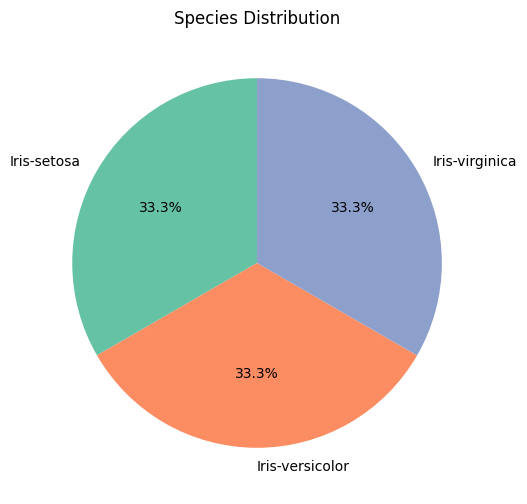

In [7]:
species_count = data['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(species_count, labels=species_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Species Distribution')
plt.show()

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
df = data.drop(columns=['species'])

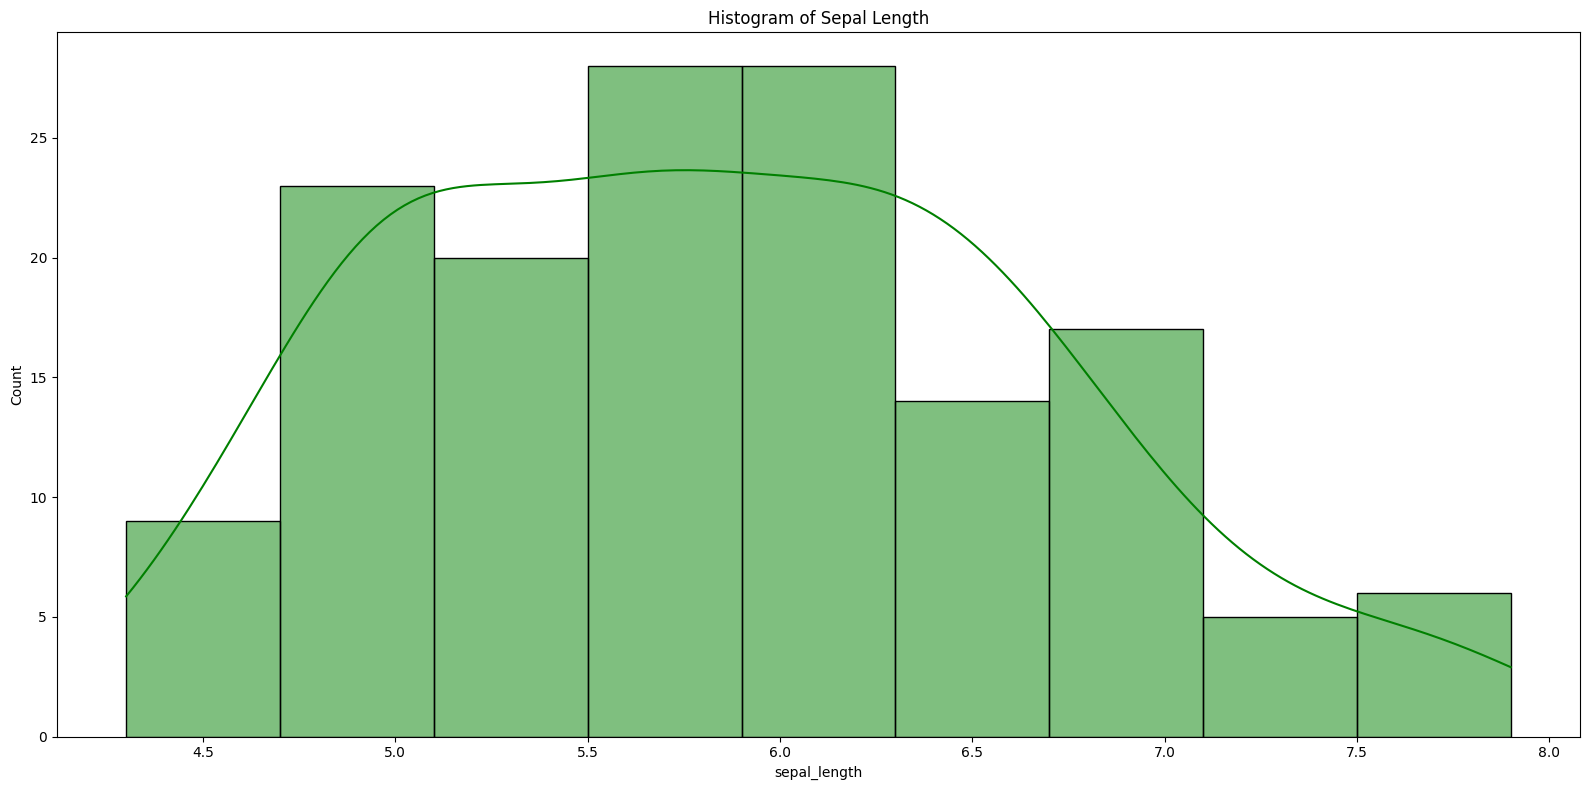

In [10]:

fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['sepal_length'], ax=ax, kde=True, color='green')

ax.set_title('Histogram of Sepal Length')

plt.tight_layout()

plt.show()


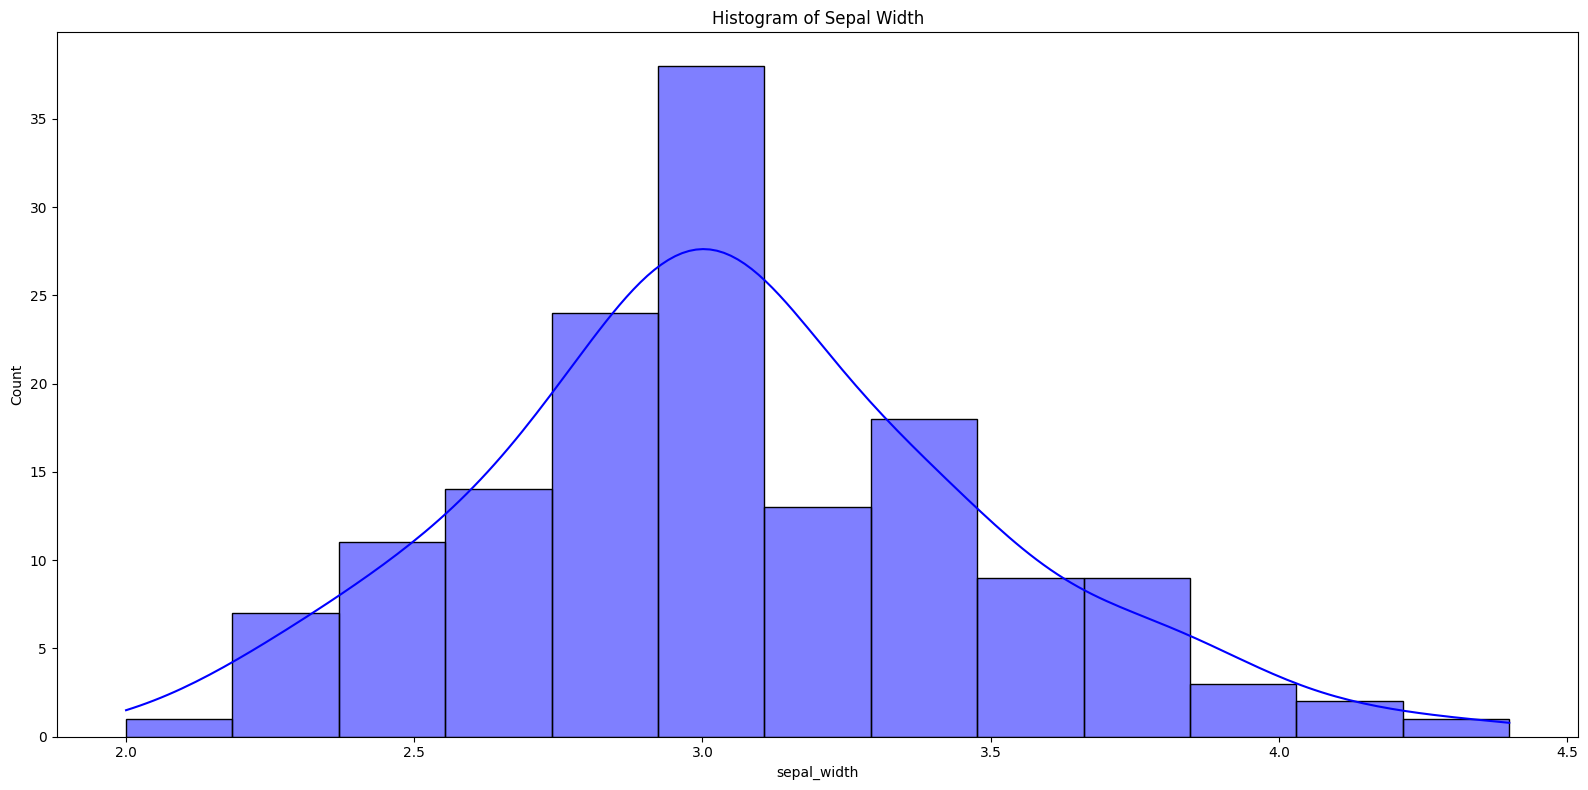

In [11]:

fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['sepal_width'], ax=ax, kde=True, color='blue')

ax.set_title('Histogram of Sepal Width')

plt.tight_layout()

plt.show()


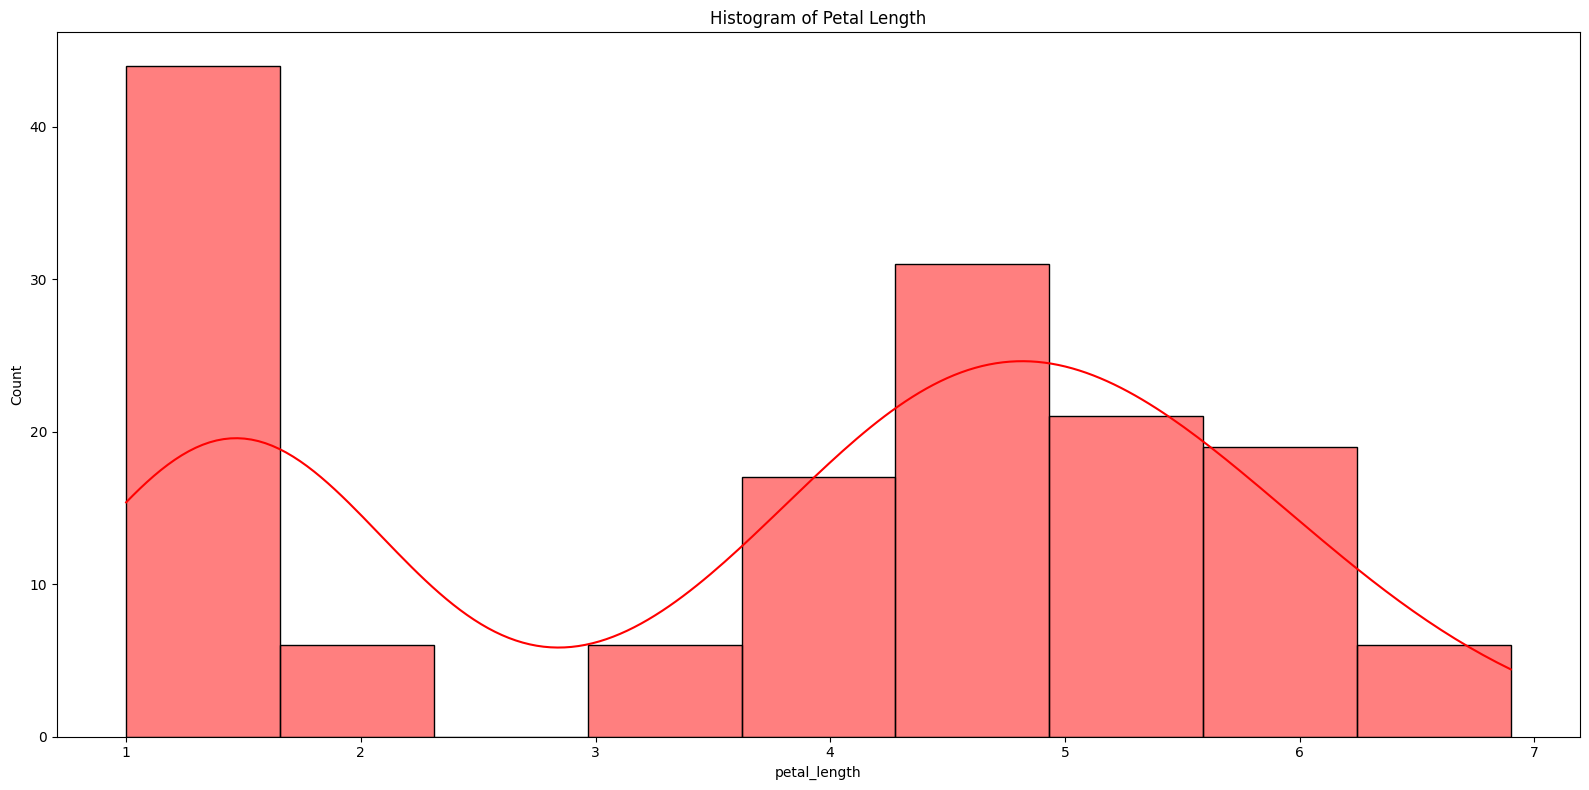

In [12]:

fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['petal_length'], ax=ax, kde=True, color='red')

ax.set_title('Histogram of Petal Length')

plt.tight_layout()

plt.show()


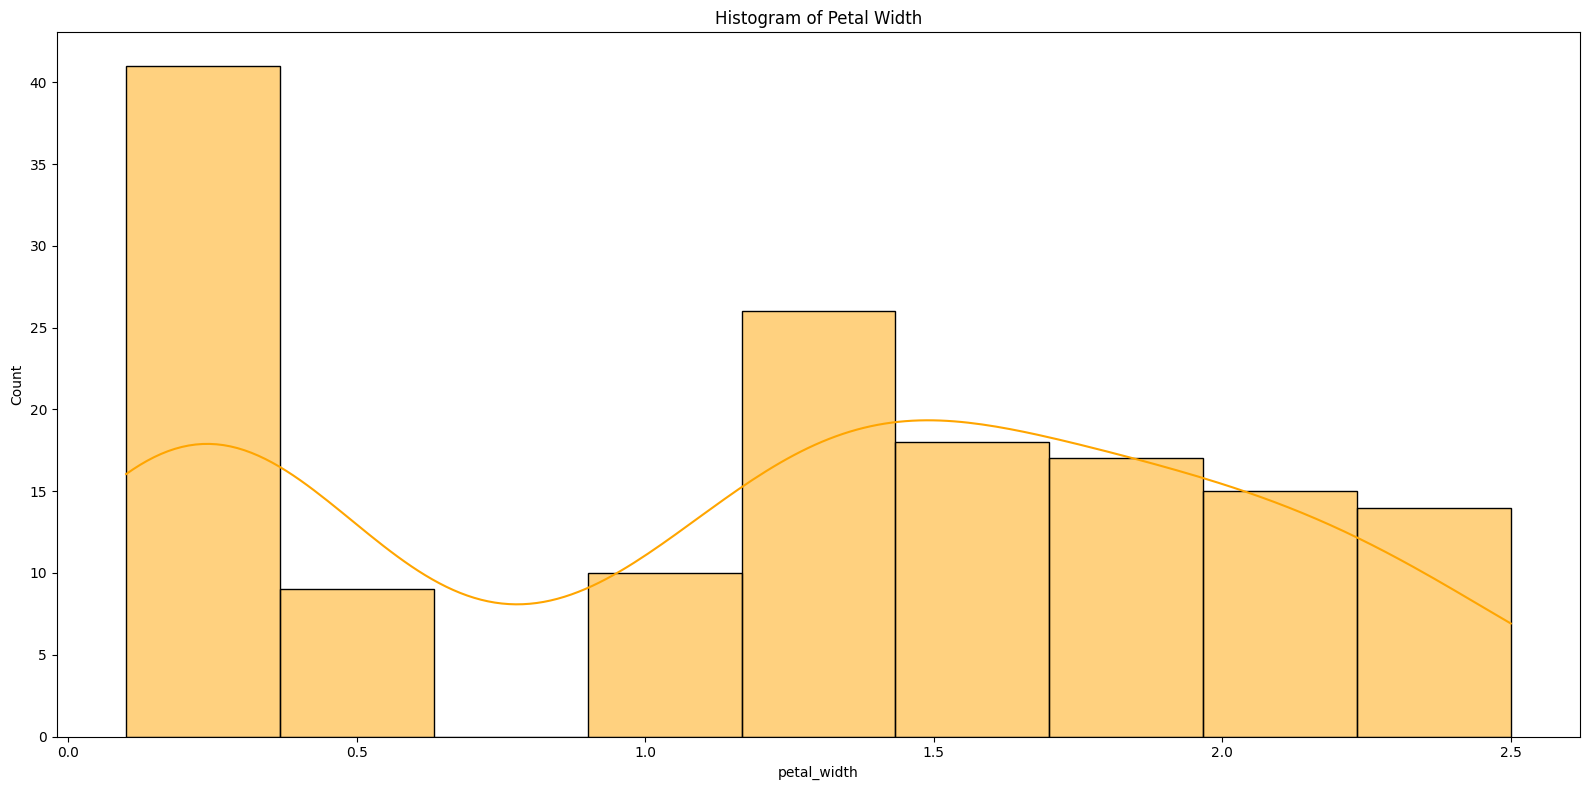

In [13]:

fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df['petal_width'], ax=ax, kde=True, color='orange')

ax.set_title('Histogram of Petal Width')

plt.tight_layout()

plt.show()


In [14]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Replace the species with numerical values
data['species'] = data['species'].replace(species_mapping)

# Display the result
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


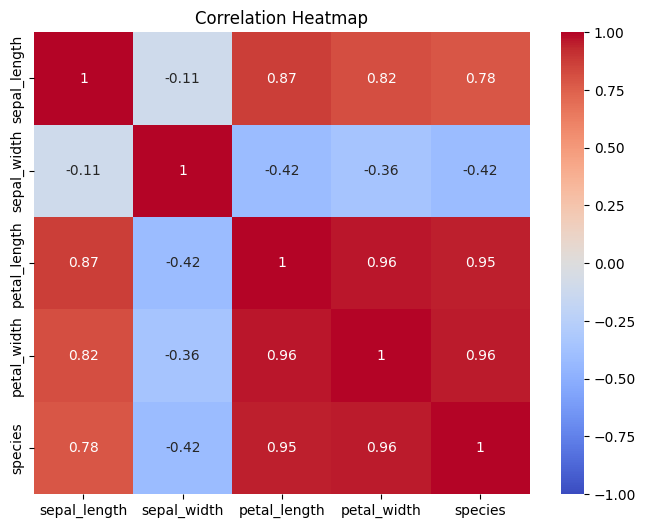

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Decision Tree for Species Prediction
X = data.drop(columns=['species'])
y = data['species']

In [18]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Prediction and Confusion Matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is : ",accuracy)

Accuracy is :  1.0


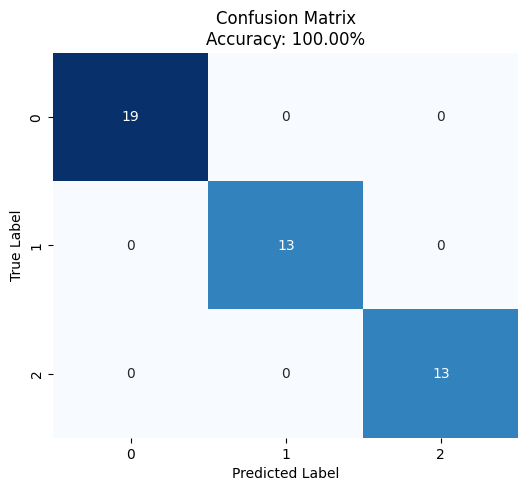

In [20]:
# Display the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy*100:.2f}%')
plt.show()